In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].apply(lambda x: iris.target_names[x])
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# Dataframe Exploration

In [2]:
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [3]:
df.dtypes

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
species,object


In [4]:
# prompt: convert the species column into category

df['species'] = df['species'].astype('category')
df.dtypes

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
species,category


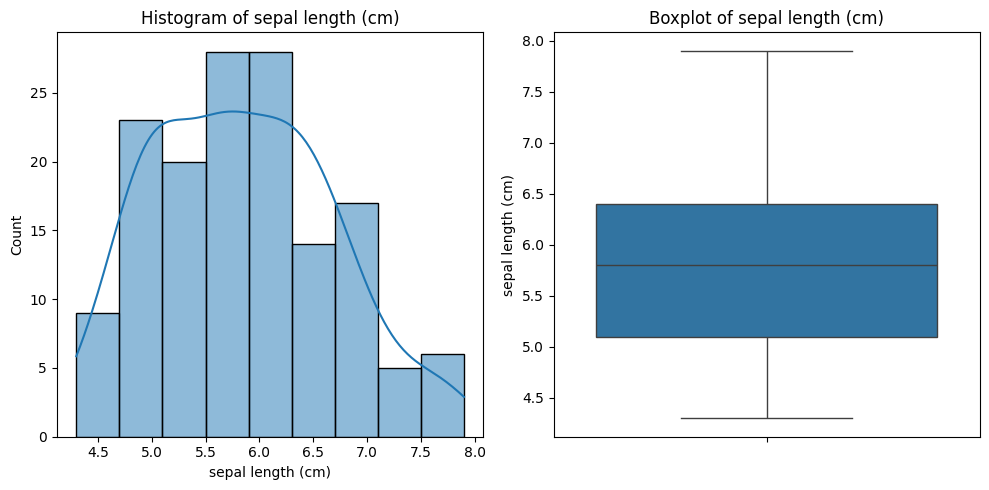

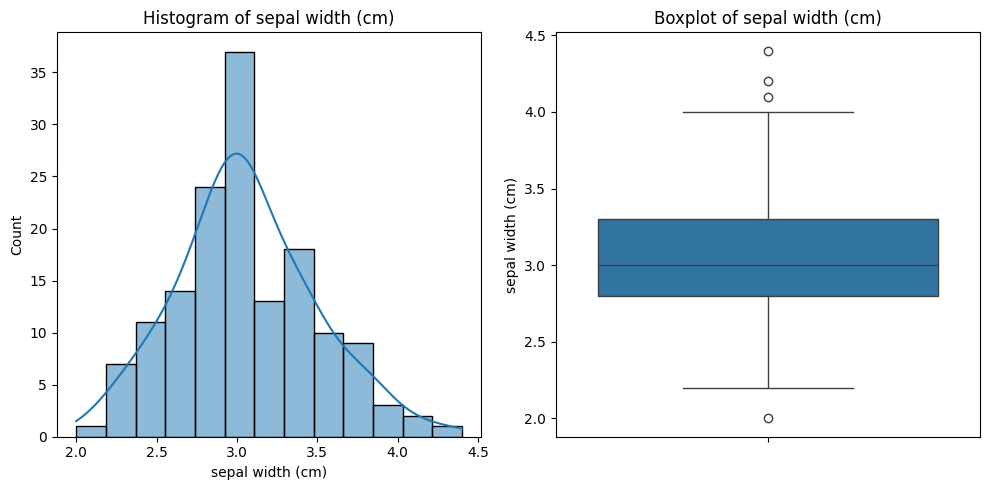

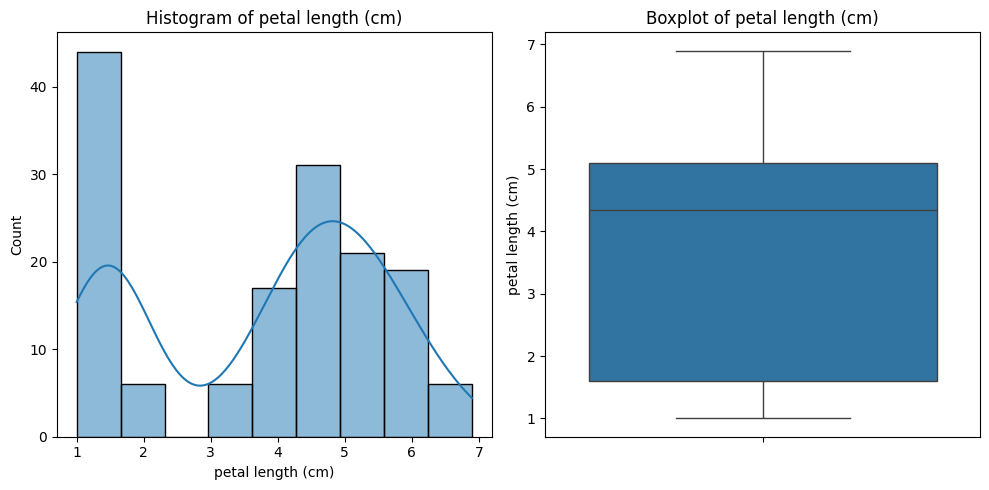

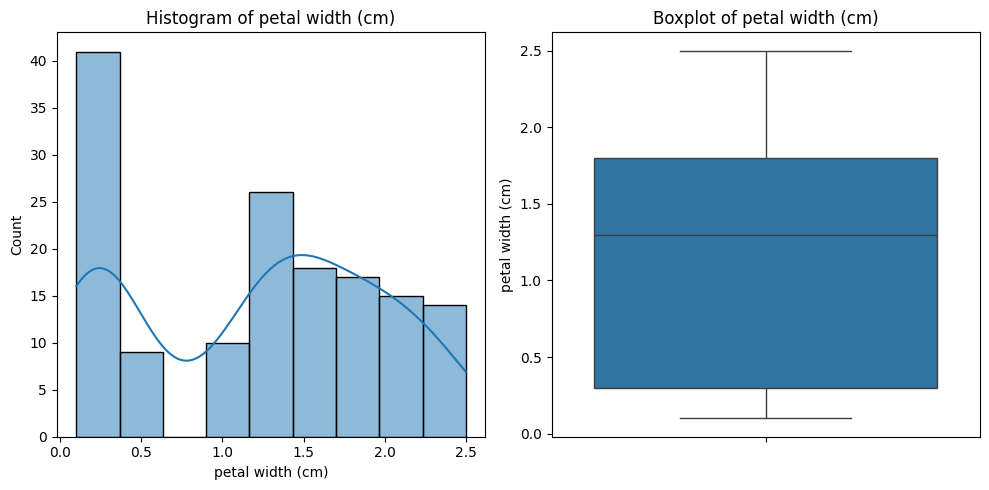

In [5]:
# prompt: generate the histograms and boxplots for the numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

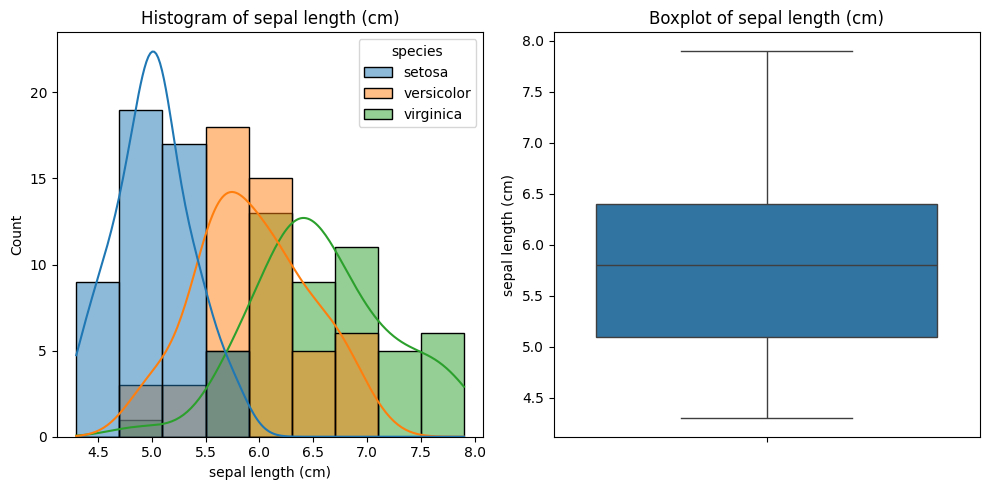

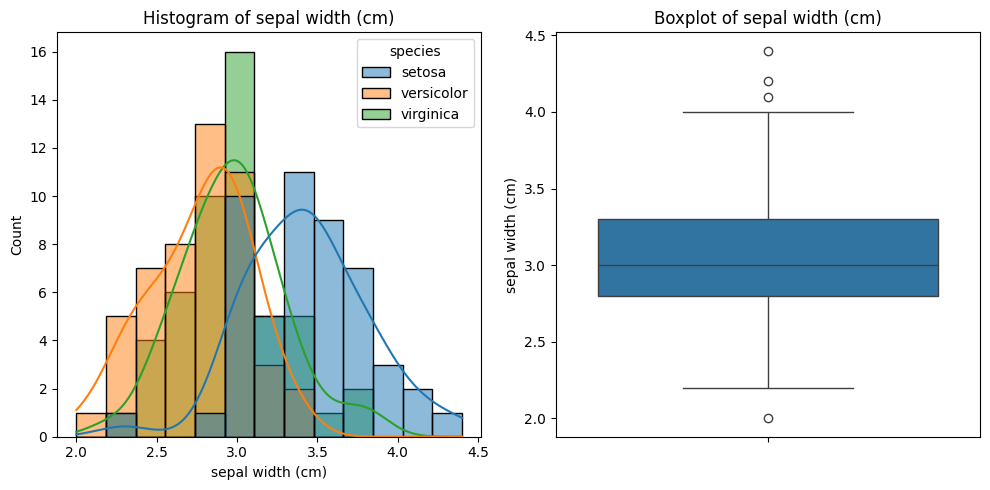

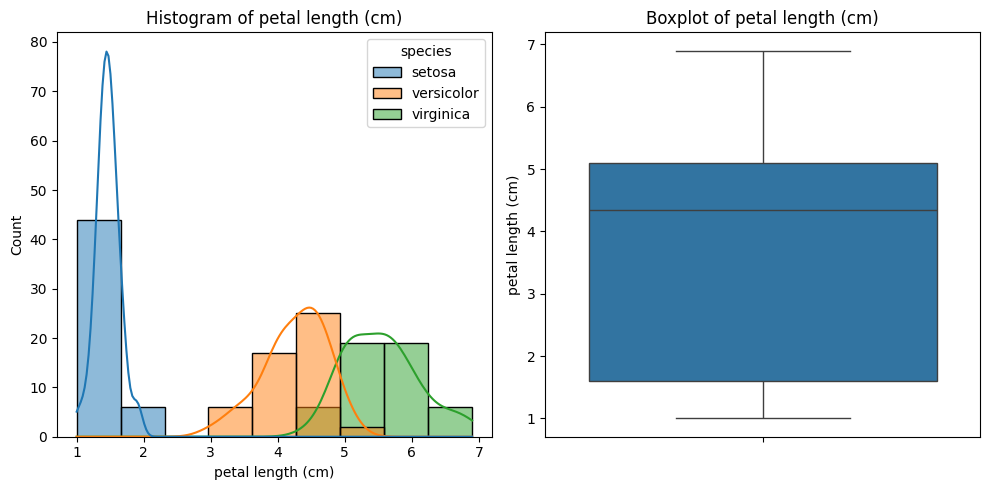

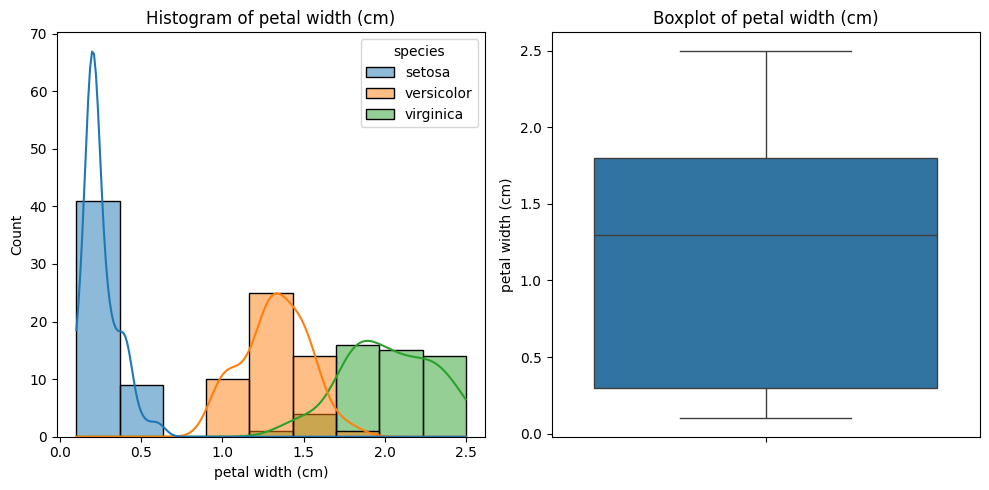

In [6]:
# prompt: for the histograms only, color them out by the species

import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].apply(lambda x: iris.target_names[x])
df.head(10)
# # Dataframe Exploration
df.isna().sum()
df.dtypes

df['species'] = df['species'].astype('category')
df.dtypes


numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, hue='species', kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

- Setosa is smallest flowe based on Petal dimensions
- Versicolor and Virginia typically have petal length and petal widths that are Larger than setosa.

- Versicolor is a medium sized flower (based on petal dimension)
- largest flower Virginica (based on petal dimensions)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


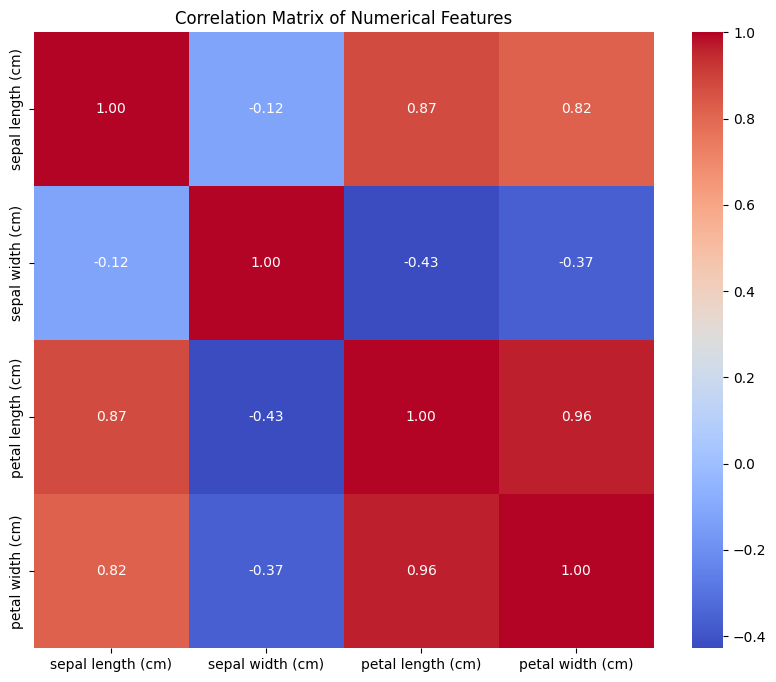

In [7]:
# prompt: for the numerical columns build a correlation matrix

correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


- PL and PW at +0.96
- 96% of the data shows that the petal dimensions are usually directly proportional to each other. When a flower has a higher PL, typically also has a higher PW.
- SL and PL at +0.87: Lengths are usually (87%) directly proportional to each other. When the length of a petal is high, the length of the sepal also tends to be larger.
- PL and SW: opposite directions. Lower PL, higher SW.
- PL smallest: setosa, outliers SW: setosa

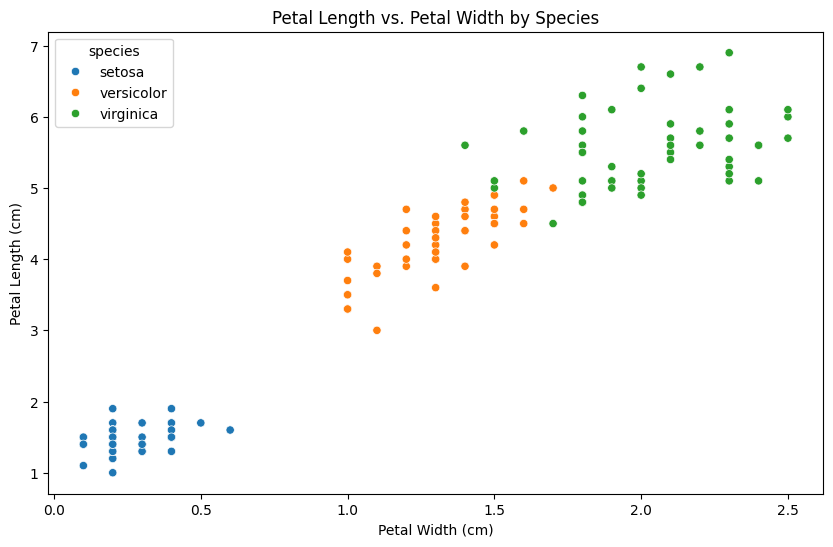

In [8]:
# prompt: scatterplot petal width on the x and petal length on the y, colored by species

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal width (cm)', y='petal length (cm)', hue='species')
plt.title('Petal Length vs. Petal Width by Species')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

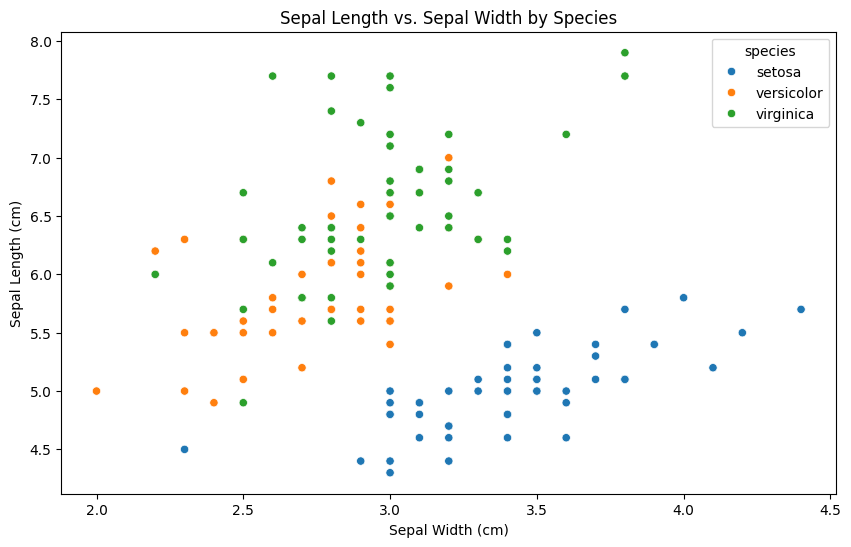

In [9]:
# prompt: scatterplot sepal width on the x and sepal length on the y, colored by species

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal width (cm)', y='sepal length (cm)', hue='species')
plt.title('Sepal Length vs. Sepal Width by Species')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.show()

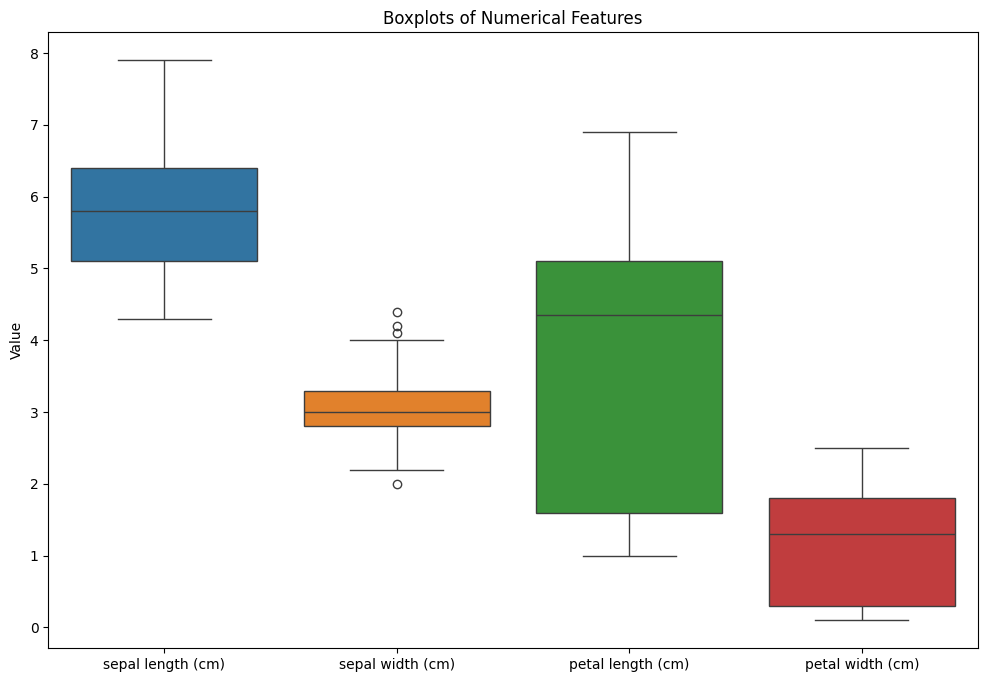

In [10]:
# prompt: one boxplot for all the numerical features

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplots of Numerical Features')
plt.ylabel('Value')
plt.show()

In [11]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [12]:
df.dtypes


,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
species,category


# Modeling - Logic regression

- numerical - price - y = mx+b
- categoricl - y1 = m1x1 + b, y2 = m2X1 + b = m1 * x1
- Iris (3 cat) , so 3 equations
- For each category, a value is calculated --- probability value.
- y1, y2, y3
- y1 = 1à - setosa, y2 = 10.5, versicolor, y3 = 5, viginica
- species - versicolor
- Highest probability
- Regression - Equation pf a line = mx+b


logistic is for cat variables


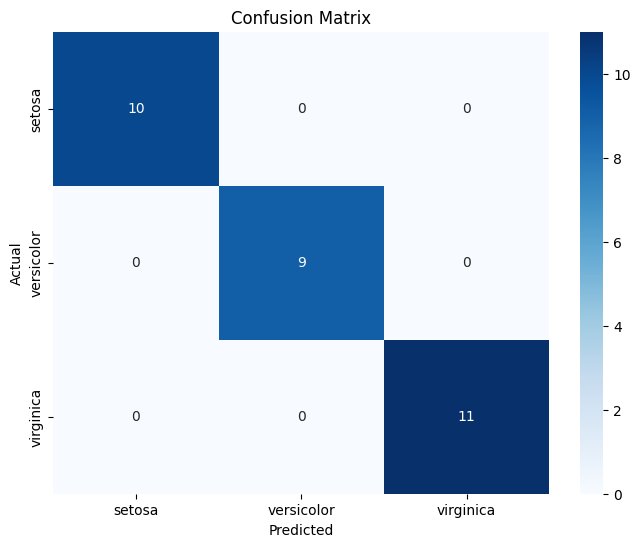

Accuracy: 1.00


In [13]:
# prompt: for the dataframe, build a logistic regression. the target value is species. split the dataset in80/20. print the confusion matrix using seaborn. Also print the accuracy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Prepare data
X = df.drop('species', axis=1)
y = df['species']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

- for ogistic regression, we are focusing on the Accuracy
- Diagonal values are correct preditions
- Your total rpediction will be 30 which is your test size.
- Total predictions = denominateur

- correct prediction/total

- ex : 10 + 9 + 11 = correct predictions

      10 + 0 + 0 + 0 + 9 + 0 + ...+ 11 = Total predictions

- Correct/ total = 1 = 100%

- The hogher the accuracy, the better the model.
- The lower the misclassified values, the better the model.
- Misclassification = Incorrect/30 = 0%
- 100% = Accuracy % + misclassification %

In [14]:
model.coef_

array([[-0.39345607,  0.96251768, -2.37512436, -0.99874594],
       [ 0.50843279, -0.25482714, -0.21301129, -0.77574766],
       [-0.11497673, -0.70769055,  2.58813565,  1.7744936 ]])

In [15]:
model.intercept_

array([  9.00884295,   1.86902164, -10.87786459])

- 3 species, so 3 lines
 - y1 - indicate for setosa = m1*SL + m2*SW + m3*Pl + m4*PW + b
 - y2 - versicolor -  m1*SL + m2*SW + m3*Pl + m4*PW + b
 - y3 - virginica -  m1*SL + m2*SW + m3*Pl + m4*PW + b

 - model.coef_ - gives away all ms


In [16]:
# prompt: for each of the model coef (2 decimals) and intercept, print out the 3 equation of the line with the species type for all 3 species

species_names = model.classes_
features = X.columns

for i, species in enumerate(species_names):
    print(f"Equation for {species}:")
    equation = f"y_{species} = "
    for j, feature in enumerate(features):
        equation += f"{model.coef_[i, j]:.2f} * {feature}"
        if j < len(features) - 1:
            equation += " + "
    equation += f" + {model.intercept_[i]:.2f}"
    print(equation)
    print("-" * 30)

Equation for setosa:
y_setosa = -0.39 * sepal length (cm) + 0.96 * sepal width (cm) + -2.38 * petal length (cm) + -1.00 * petal width (cm) + 9.01
------------------------------
Equation for versicolor:
y_versicolor = 0.51 * sepal length (cm) + -0.25 * sepal width (cm) + -0.21 * petal length (cm) + -0.78 * petal width (cm) + 1.87
------------------------------
Equation for virginica:
y_virginica = -0.11 * sepal length (cm) + -0.71 * sepal width (cm) + 2.59 * petal length (cm) + 1.77 * petal width (cm) + -10.88
------------------------------


- y_setosa = -0.39 * sepal length (cm) + 0.96 * sepal width (cm) + -2.38 * petal length (cm) + -1.00 * petal width (cm) + 9.01

- Greatest feature : Pl is the most important feature for predicting setosa species.
- The least importantfeatre is sepal lenght.



- y_versicolor = 0.51 * sepal length (cm) + -0.25 * sepal width (cm) + -0.21 * petal length (cm) + -0.78 * petal width (cm) + 1.87

- Most important feture = Petal width
- least impo : petal lenght

- y_virginica = -0.11 * sepal length (cm) + -0.71 * sepal width (cm) + 2.59 * petal length (cm) + 1.77 * petal width (cm) + -10.88

- Most important = PL
- Least important = SL

- Greatest feature : Pl is the most important feature for predicting setosa species.
- The least importantfeatre is sepal lenght.


- Most important feture = Petal width

- least impo : petal lenght


- Most important = PL

- Least important = SL


- Most imprtant feature ovrerall - setosa & virginica, PL is the most imprtant feature
- Petal lenght need to be here (there)
- Setosa is a smaller flower for PL - m value is pos
- Virginica is larger flower regarding  PL - m value is pos. ``
- Petal widht is most important for versicolor - smaller PW is usually versicolor

- Overall, petal features are better tp differentiate.



# Model 2 - Keeping the most important features


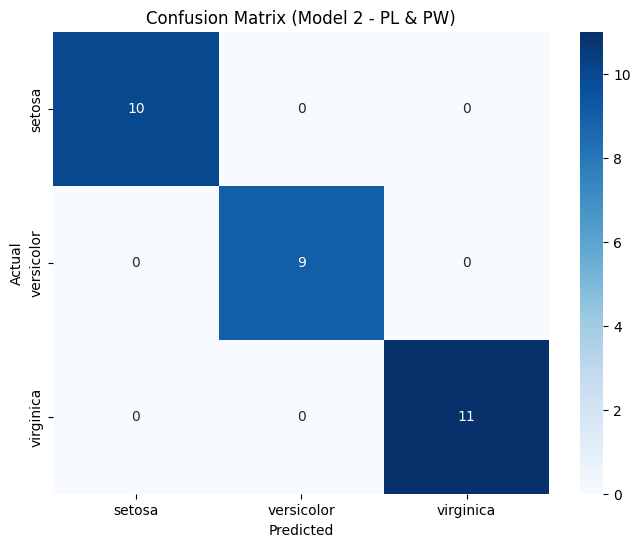

Accuracy (Model 2 - PL & PW): 1.00


In [17]:
# prompt: create a newlogistic regression. keep only the features PL & PW to predict features. print hte confusion matri usig seaborn also print the accuracy . Random state at 42. test size at 0.2 and max_iter = 200

# Prepare data - keeping only 'petal length (cm)' and 'petal width (cm)'
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['species']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Build and train the logistic regression model
model_2 = LogisticRegression(max_iter=200)
model_2.fit(X_train, y_train)

# Make predictions
y_pred_2 = model_2.predict(X_test)

# Print confusion matrix
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=model_2.classes_, yticklabels=model_2.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Model 2 - PL & PW)')
plt.show()

# Print accuracy
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f'Accuracy (Model 2 - PL & PW): {accuracy_2:.2f}')

- Mod 1 - had 4 variables and the accuracy = 1
- Mod 2 - 2 variables, accuracy = 1

- Model 1 is better, more variables
- more variables ( more data, more time, more cost)

- 4 variables = 150 * 4
- 2 variables = 150 * 2 (50% lesser cells)



# Improvingn model - Delet the useless - Delete SL, SW

# Improving outliers

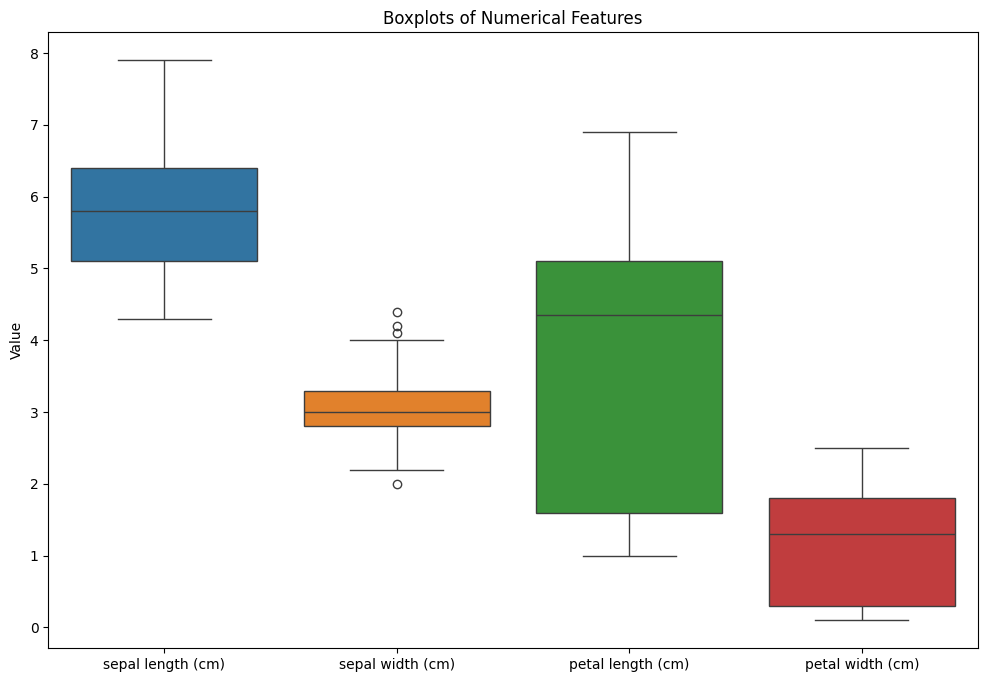

In [18]:
# prompt: build a boxplot for all the numerical features

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplots of Numerical Features')
plt.ylabel('Value')
plt.show()

-given our base line , was SW important ?
- If Mod 1  & Mod 2 did not have SW.

- Model 3 - removing outliers ( just or the plot)


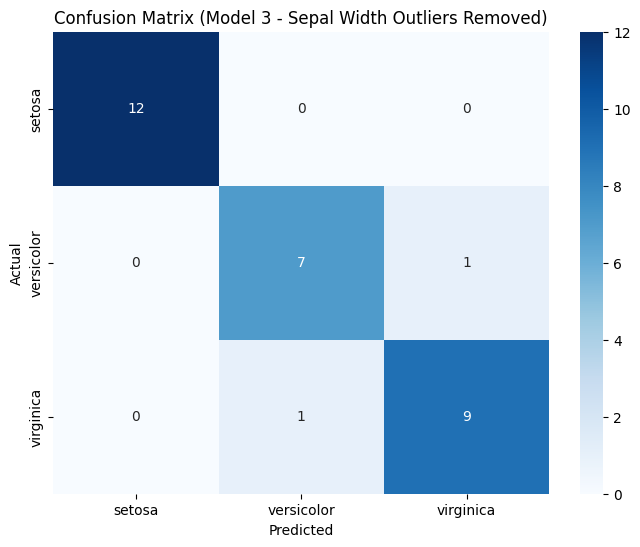

Accuracy (Model 3 - Sepal Width Outliers Removed): 0.93


In [19]:
# prompt: create a new mdel : model 3 . for sepal width remove the outliers. build logistic regression , prit the confusion matrix with seaborn and print the accuracy . Make max_iter at 200% and random state 42. test size 0.2

# Model 3 - Removing outliers from 'sepal width (cm)'

# Calculate the IQR for 'sepal width (cm)'
Q1 = df['sepal width (cm)'].quantile(0.25)
Q3 = df['sepal width (cm)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['sepal width (cm)'] >= lower_bound) & (df['sepal width (cm)'] <= upper_bound)]

# Prepare data from the dataframe without outliers
X_no_outliers = df_no_outliers.drop('species', axis=1)
y_no_outliers = df_no_outliers['species']

# Split data
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.20, random_state=42
)

# Build and train the logistic regression model
# Use max_iter 200% of 200, which is 400
model_3 = LogisticRegression(max_iter=400, random_state=42)
model_3.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions
y_pred_3 = model_3.predict(X_test_no_outliers)

# Print confusion matrix
conf_matrix_3 = confusion_matrix(y_test_no_outliers, y_pred_3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3, annot=True, fmt='d', cmap='Blues', xticklabels=model_3.classes_, yticklabels=model_3.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Model 3 - Sepal Width Outliers Removed)')
plt.show()

# Print accuracy
accuracy_3 = accuracy_score(y_test_no_outliers, y_pred_3)
print(f'Accuracy (Model 3 - Sepal Width Outliers Removed): {accuracy_3:.2f}')

- SW outliers help to differentiate versicolor & virginica.

- Removal of the outliers reduced the accuracy.

- Correct prediction = 12 + 7 + 9 = 28
-  Incorrect = 1 + 1 = 2
- Accuracy = 28/(28+2) = 94%
- Missclassified = 2/(28+2) = 6%



- Model 1 - 4 variables = 100% acc
- Model 2 - 2 variables = 100% acc
- Model 3, 4 variables , n outliers = 94% accuracy.

Business case - the model is not perfect (100%), model 3.


# Improving models based on P-values

In [20]:
# prompt: create model 4 which is a logistic regression and assess pvalues.

import statsmodels.api as sm

# Prepare data for Model 4 (same as Model 1 to check p-values for all features)
X = df.drop('species', axis=1)
y = df['species']

# Convert target variable to numerical for statsmodels
y_numeric = y.astype('category').cat.codes

# Add a constant (intercept) to the features
X = sm.add_constant(X)

# Build and train the logistic regression model using statsmodels
# Statsmodels provides more detailed statistical outputs like p-values
model_4_sm = sm.MNLogit(y_numeric, X) # Using MNLogit for multinomial logistic regression
results_4_sm = model_4_sm.fit()

# Print the summary which includes p-values
print(results_4_sm.summary())

# Interpret p-values:
# A p-value less than a chosen significance level (commonly 0.05) suggests that the corresponding feature is statistically significant
# and contributes to the prediction of the target variable.
# Look at the 'P>|z|' column in the summary output.

Optimization terminated successfully.
         Current function value: nan
         Iterations 26
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      140
Method:                           MLE   Df Model:                            8
Date:                Fri, 06 Jun 2025   Pseudo R-squ.:                     nan
Time:                        13:11:25   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                       nan
              y=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                    nan        nan        nan        nan         nan         nan
sepal length

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


- Categorical targets do not have P-values.

# Scaling


# Model 5A - Standard scaler

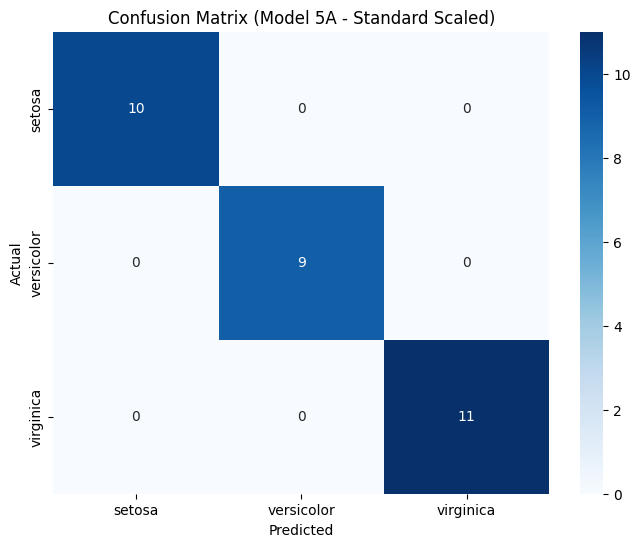

Accuracy (Model 5A - Standard Scaled): 1.00


In [21]:
# prompt: cretae a new df called scaled df, take num values, scale them with standard scaler. build a logreg, print the confusion matrix with seaborn  also print the accuracy

from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
X_num = df[numerical_cols]

# Initialize and fit StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# Create a new DataFrame with scaled numerical features
# You might want to add back the non-numerical columns if they exist and are needed
scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols, index=df.index)

# Add the target variable back for the logistic regression model
scaled_df['species'] = df['species']


# Prepare data for logistic regression with scaled features
X_scaled_model = scaled_df.drop('species', axis=1)
y_scaled_model = scaled_df['species']

# Split data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled_model, y_scaled_model, test_size=0.20, random_state=42
)

# Build and train the logistic regression model
model_scaled = LogisticRegression(max_iter=200, random_state=42)
model_scaled.fit(X_train_scaled, y_train_scaled)

# Make predictions
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Print confusion matrix
conf_matrix_scaled = confusion_matrix(y_test_scaled, y_pred_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_scaled, annot=True, fmt='d', cmap='Blues', xticklabels=model_scaled.classes_, yticklabels=model_scaled.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Model 5A - Standard Scaled)')
plt.show()

# Print accuracy
accuracy_scaled = accuracy_score(y_test_scaled, y_pred_scaled)
print(f'Accuracy (Model 5A - Standard Scaled): {accuracy_scaled:.2f}')

- Mode 5A= Model 1 have the same results
- pick model 1 over 5 variables.

# 5B - Normalize.

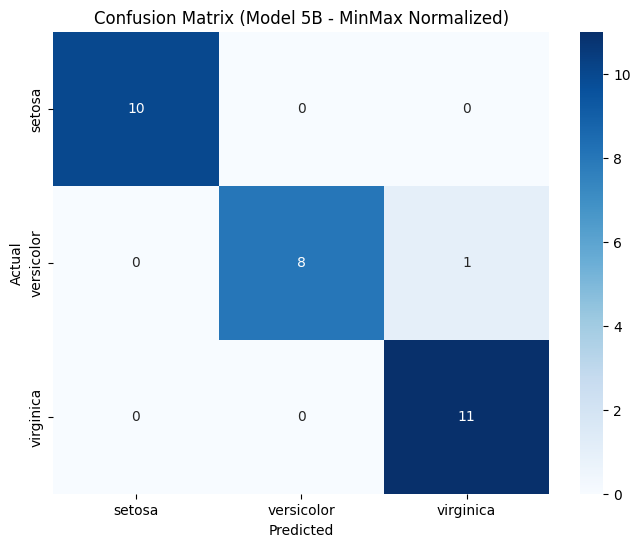

Accuracy (Model 5B - MinMax Normalized): 0.97


In [22]:
# prompt: create a new df, called normalkizeddf, use min max scaler for nuerical values, build a logreg and print the accuracy and th confusion matrix

from sklearn.preprocessing import MinMaxScaler

# Select numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
X_num = df[numerical_cols]


# Initialize and fit MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_num)

# Create a new DataFrame with normalized numerical features
# You might want to add back the non-numerical columns if they exist and are needed
normalized_df = pd.DataFrame(X_normalized, columns=numerical_cols, index=df.index)

# Add the target variable back for the logistic regression model
normalized_df['species'] = df['species']

# Prepare data for logistic regression with normalized features
X_normalized_model = normalized_df.drop('species', axis=1)
y_normalized_model = normalized_df['species']

# Split data
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(
    X_normalized_model, y_normalized_model, test_size=0.20, random_state=42
)

# Build and train the logistic regression model
model_normalized = LogisticRegression(max_iter=200, random_state=42)
model_normalized.fit(X_train_normalized, y_train_normalized)

# Make predictions
y_pred_normalized = model_normalized.predict(X_test_normalized)

# Print confusion matrix
conf_matrix_normalized = confusion_matrix(y_test_normalized, y_pred_normalized)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='d', cmap='Blues', xticklabels=model_normalized.classes_, yticklabels=model_normalized.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Model 5B - MinMax Normalized)')
plt.show()

# Print accuracy
accuracy_normalized = accuracy_score(y_test_normalized, y_pred_normalized)
print(f'Accuracy (Model 5B - MinMax Normalized): {accuracy_normalized:.2f}')

- Mod 1 - baseline - 4V - 100%
- Mod 2 - kept important - 2 - 100
- Mod 3 - outliers - 4 - 94
- MOd 4 - invalid
- Mod 5A - baseline - 4 - 100
- Mod 5B - normalized - 4 - 96

- Two is the best  : model with less variables
- Non perfect , but goodenough - 5B then 3
- Model with no add steps - model 1 - 100%

- Numerical targets - number - evaluation based on : R2 - MSE - Mean of residuals
- Categorical Target - cat - accuracy (confusion matrix)
